# Analyze Categories of the Data with Groupby

- Use [this CheatSheet](https://www.craft.do/s/G80r1dqrQKrjTb/b/6FC991B6-1161-4F88-A315-3E84528A1950/groupby()-Categorical-Columns-to-Sum) to work better with the following exercises.

## 1 Categorical & 1 Numerical

### Tips Dataset

In which `day` do people spend more `money` in the restaurant?

- Every row represents a table in the restaurant
- Every column represents characteristics of the tables

In [5]:
import seaborn as sns

df_tips = sns.load_dataset('tips')
df_tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
...,...,...,...,...,...,...,...
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


#### Data Manipulation

In [6]:
dff = df_tips.groupby('day').total_bill.mean().sort_values().reset_index()
df

,day,total_bill
0,Fri,17.151579
1,Thur,17.682742
2,Sat,20.441379
3,Sun,21.410000


#### Plot

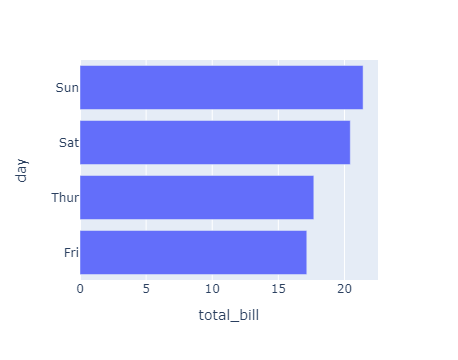

In [7]:
import plotly.express as px

px.bar(data_frame=dff, y='day', x='total_bill')

### Titanic Dataset

Who was `older`: people who `survived`, or those who didn't?
- Every row represents a person in the titanic
- Every column represts characteristics of the people

In [8]:
df_titanic = sns.load_dataset('titanic')
df_titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True


#### Data Manipulation

In [9]:
dff = df_titanic.groupby('alive').age.mean().reset_index()

In [10]:
dff

,alive,age
0,no,30.626179
1,yes,28.343690


#### Plot

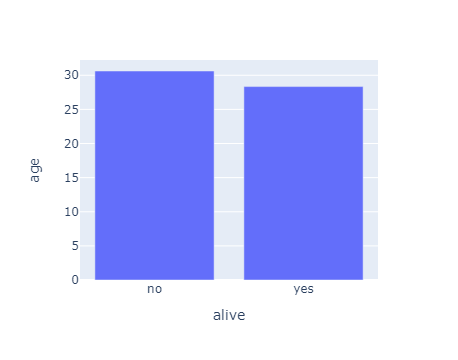

In [11]:
px.bar(data_frame=dff, x='alive', y='age')

## 2 Categorical & 1 Numerical

### Tips Dataset

When do people spend more `money` in the restaurant based on the `day` and the `time`?

In [13]:
df_tips #!

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
...,...,...,...,...,...,...,...
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


#### Data Manipulation

In [14]:
dff = df_tips.groupby(['day', 'time']).total_bill.mean().sort_values().reset_index()

In [15]:
dff

,day,time,total_bill
0,Fri,Lunch,12.845714
1,Thur,Lunch,17.664754
2,Thur,Dinner,18.780000
3,Fri,Dinner,19.663333
4,Sat,Dinner,20.441379
5,Sun,Dinner,21.410000
6,Sat,Lunch,NaN
7,Sun,Lunch,NaN


#### Plot

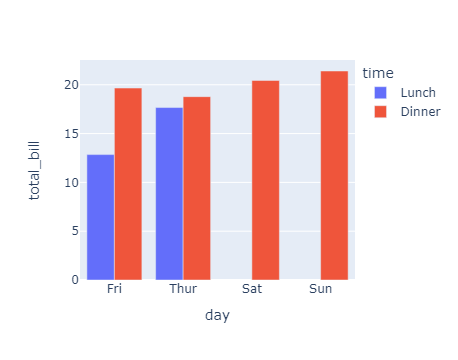

In [16]:
px.bar(data_frame=dff, x='day', y='total_bill', color='time', barmode='group')

### Titanic Dataset

Were `females` who survived `older` than males who `survived`?

In [18]:
df_titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True


#### Data Manipulation

In [23]:
dff = df_titanic.groupby(['sex', 'alive']).age.mean().sort_values().reset_index()

In [24]:
dff

,sex,alive,age
0,female,no,25.046875
1,male,yes,27.276022
2,female,yes,28.847716
3,male,no,31.618056


#### Plot

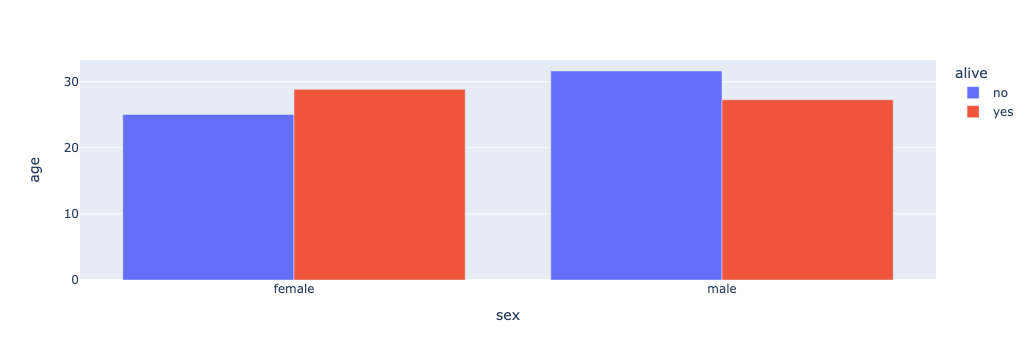

In [25]:
px.bar(data_frame=dff, x='sex', y='age', color='alive', barmode='group')

## 3 Categorical & 1 Numerical

### Tips Dataset

When do people give more `tip` in the restaurant based on the `day`, `time` and `sex`?

In [35]:
df_tips #!

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
...,...,...,...,...,...,...,...
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


#### Data Manipulation

In [39]:
dff = df_tips.groupby(['day', 'time', 'sex']).tip.mean().sort_values().reset_index()

In [40]:
dff

,day,time,sex,tip
0,Fri,Lunch,Male,1.900000
1,Thur,Lunch,Female,2.561935
...,...,...,...,...
14,Sun,Lunch,Male,NaN
15,Sun,Lunch,Female,NaN


#### Plot

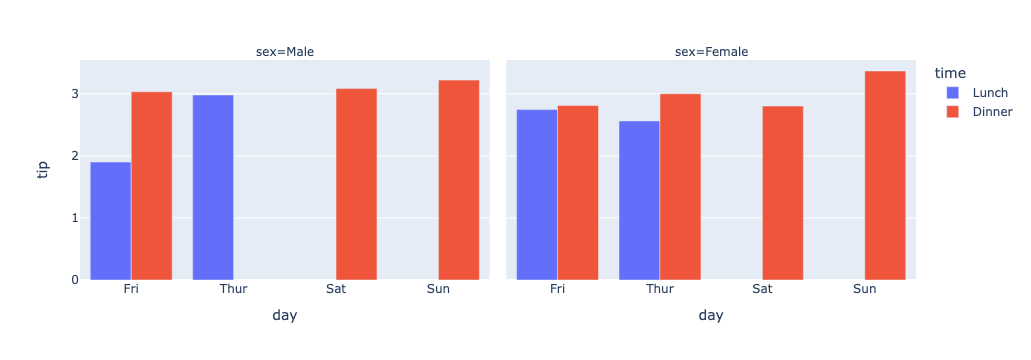

In [44]:
px.bar(data_frame=dff, x='day', y='tip', color='time', barmode='group', facet_col='sex')

### Titanic Dataset

Were `females` who survived in first `class` `older` than males who `survived`?

In [45]:
df_titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True


#### Data Manipulation

In [46]:
dff = df_titanic.groupby(['sex', 'class', 'alive']).age.mean().sort_values().reset_index()

In [47]:
dff

,sex,class,alive,age
0,male,Second,yes,16.022000
1,female,Third,yes,19.329787
...,...,...,...,...
10,male,First,yes,36.248000
11,male,First,no,44.581967


#### Plot

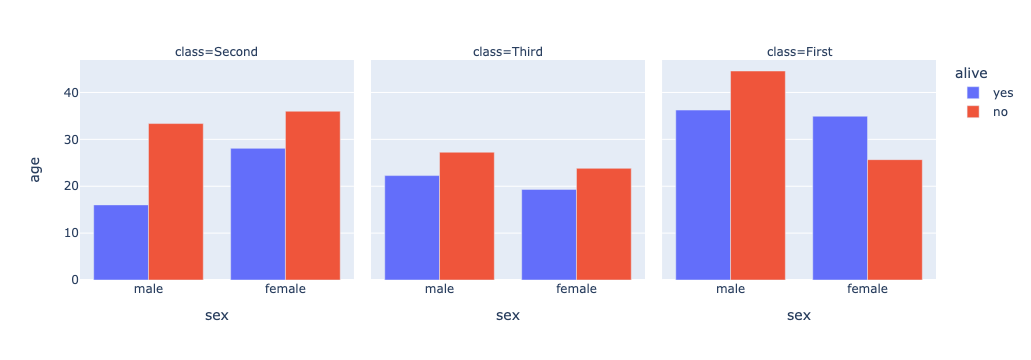

In [49]:
px.bar(data_frame=dff, x='sex', y='age', color='alive', barmode='group', facet_col='class')

## 1 Categorical

This time, you need to count the `size()` based on the repetitions of each group within the column.

If you get lost, Google: "pandas dataframe count values in column"

### Tips Dataset

In which day of the week had the restaurant more tables occupied?

In [27]:
df_tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
...,...,...,...,...,...,...,...
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


#### Data Manipulation

In [28]:
dff = df_tips.groupby('day').size().reset_index(name='freq')

In [29]:
dff

,day,freq
0,Thur,62
1,Fri,19
2,Sat,87
3,Sun,76


#### Plot

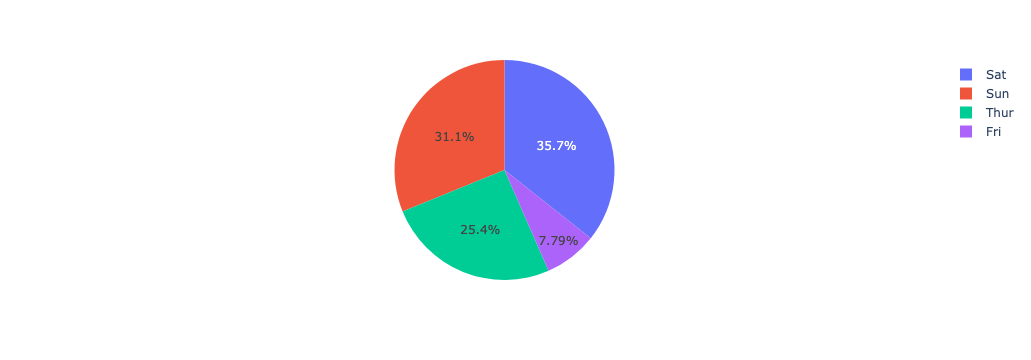

In [30]:
px.pie(data_frame=dff, names='day', values='freq')

### Titanic Dataset

How many people did survive the Titanic?

In [31]:
df_titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True


#### Data Manipulation

In [33]:
dff = df_titanic.groupby('survived').size().reset_index(name='freq')

#### Plot

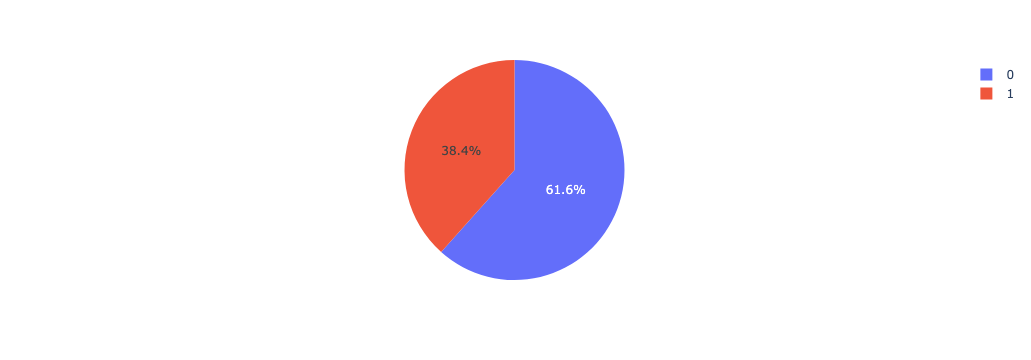

In [34]:
px.pie(data_frame=dff, names='survived', values='freq')